# Q&A Activity Question Week -10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score

In [47]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np             # Necessary packages
import seaborn as sns
import matplotlib.pyplot as plt

# *1) Load the data into the pandas environment and identify some basic details of the dataset.*

In [48]:
df=pd.read_csv('employee.csv')             # Loading data in desired format using pandas library.
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


### Basic details

In [49]:
df.shape     # no. of rows and columns

(9, 7)

In [50]:
df.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [52]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [53]:
df.describe(include='all')

,name,age,income,gender,department,grade,performance_score
count,9,7.000000,7.000000,7,9,9,9.000000
unique,9,NaN,NaN,2,3,4,NaN
top,Josh Wills,NaN,NaN,F,Sales,G3,NaN
freq,1,NaN,NaN,5,3,5,NaN
mean,NaN,40.428571,52857.142857,NaN,NaN,NaN,610.666667
std,NaN,12.204605,26028.372797,NaN,NaN,NaN,235.671912
min,NaN,23.000000,16000.000000,NaN,NaN,NaN,53.000000
25%,NaN,31.000000,38500.000000,NaN,NaN,NaN,556.000000
50%,NaN,45.000000,52000.000000,NaN,NaN,NaN,674.000000
75%,NaN,49.500000,63500.000000,NaN,NaN,NaN,711.000000


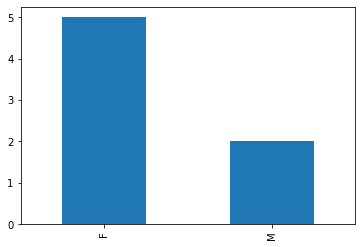

In [54]:
df['gender'].value_counts().plot(kind='bar');

### Findings:

# 
    1)The given dataset shows performance and income of nine employees in various departments of a business related company.
    
    performance is analysed for the three departments: Operations,finance and Sales.
        
    2)The dataframe contains 7 features and 9 entries with 4 categorical features. 
    
        Features given are: name, gender, department, grade, age, income and performance score. 
            
    4)Datatypes present in the dataset: Two float, one integer, four object datatypes.
        
    5)There are some missing values in columns; age(2), income(2), gender(2).
    
    6)The data contains more no.of female employees. About 5 are females and 2 are males. The gender of two of employees is          unknown.
    
    7)from statistical informations;
    
        There are a total of 9 counts, some values from age , income and gender are missing.
        
      • mean age of employees = 40 (Leo Duck is the youngest person in this group(age=23) and James Authur & Josh Wills are of age 54) and more than 75% of employees are of 49 age group.
    
      • mean income by employees = 52857.14 (income ranges between 16000 & 98000).
    
      • mean performance score of employees = 610.66 (more than 75% employees score 711). 
        
        Highest performance is shown by Josh Wills of finance department(901) eventhough he is one of the eldest in this group and James Authur from operations deptartment has least performance score of 53.
    
    
    

## *2) Reset the index as "name" as the index.*

In [55]:
df.set_index('name',inplace=True)        # Making 'name' as index column
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## *3)  Select rows for specific names Jack Morgan and Josh wills.*

In [56]:
df.loc[['Jack Morgan', 'Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## *4) Select data for multiple values "Sales" and “Finance”.*

In [57]:
df.loc[(df['department']=='Sales') | (df['department']== 'Finance'),:]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## *5) Display employee who has more than 700 performance score*

In [58]:
employee_df = df.query('performance_score > 700')
employee_df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709



from above table, josh wills is the top employee with a performance score of 901.

## *6) Display employee who has more than 500 and less than 700 performance score*

In [59]:
df.loc[(df['performance_score']>500) & (df['performance_score']<700), :]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


Four employees have performance score between 500 and 700. 

## *7) Check and handle missing values in the dataset.*

In [60]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [61]:
df.dtypes       #checking data types

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

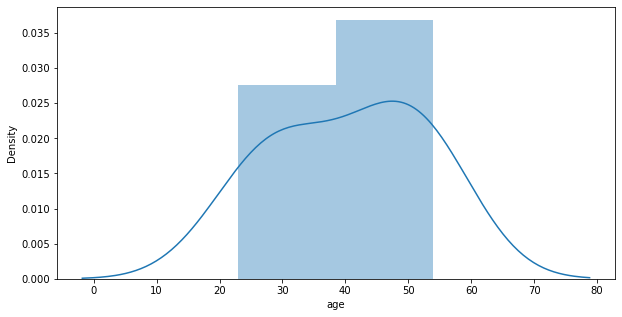

In [62]:
fig, ax = plt.subplots(figsize=(10,5))        #checking skewness of numerical variable
sns.distplot(df.age);

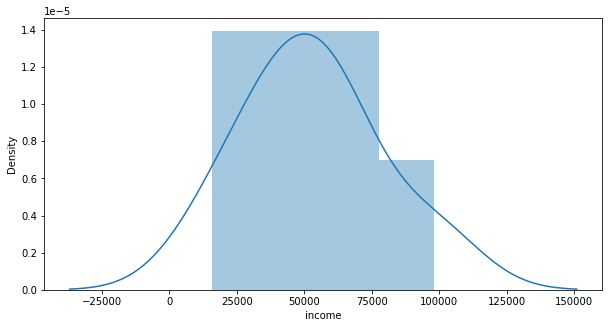

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
sns.distplot(df.income);

In [64]:
#method1: using mean.
df["age"] = df["age"].replace(np.NaN, df["age"].mean())
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,NaN,NaN,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,NaN,Sales,G3,649
James Authur,54.000000,NaN,F,Operations,G3,53
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


In [65]:
# filling by mean in 'income' column
df["income"] = df["income"].replace(np.NaN, df["income"].mean())
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,NaN,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711
Satyam Sharma,40.428571,62000.000000,NaN,Sales,G3,649
James Authur,54.000000,52857.142857,F,Operations,G3,53
Josh Wills,54.000000,52000.000000,F,Finance,G3,901
Leo Duck,23.000000,98000.000000,M,Sales,G4,709


In [66]:
df.isna().sum()

age                  0
income               0
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [67]:
#method 2: (using median)
#           df['age']=df['age'].fillna(df['age'].median())
#           df['income']=df['income'].fillna(df['income'].median())

Now, we want to fill the categorical feature 'gender'.

In [68]:
df.at['Allen Smith','gender']="M"
df.at['Satyam Sharma','gender']="M"

In [69]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

## *8) Check the outliers and handle outliers in performance score using Percentiles.*

### Age

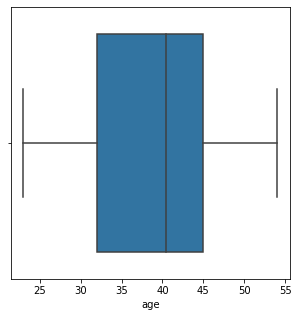

In [70]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(df.age);

### Income

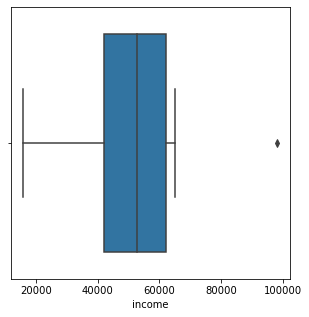

In [71]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(df.income);

#### Insights:
    There is one outlier in the column 'income'. 

In [72]:
# finding different quartile values

Q1= np.percentile(df['income'], 25, interpolation='midpoint')
Q2= np.percentile(df['income'], 50, interpolation='midpoint')
Q3= np.percentile(df['income'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

42000.0
52857.142857142855
62000.0


In [73]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

12000.0
92000.0


In [74]:
outlier=[]
for x in df['income']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [75]:
outlier

[98000.0]

In [76]:
ind1 = df['income'] > up_lim             # finding index of these outliers.
df.loc[ind1].index

Index(['Leo Duck'], dtype='object', name='name')

### performance score

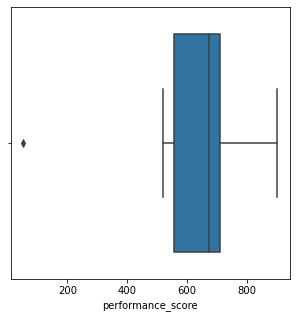

In [77]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(df.performance_score);

#### Insights: 
There is one outlier in column 'income'

In [78]:
# finding different quartile values

Q1= np.percentile(df['performance_score'], 25, interpolation='midpoint')
Q2= np.percentile(df['performance_score'], 50, interpolation='midpoint')
Q3= np.percentile(df['performance_score'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [79]:
IQR = Q3-Q1                # assigning variable IQR which denotes inter quartile range.
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

323.5
943.5


In [80]:
outlier=[]
for x in df['performance_score']:
    if ((x > up_lim) or (x < low_lim)):
        outlier.append(x)

In [81]:
outlier

[53]

In [82]:
ind1 = df['performance_score'] < low_lim             # finding index of these outliers.
df.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

### Findings:

There is one outlier in column 'income' and 'performance_score' each. since the dataset is small it would be better to keep them.

## *9) Check the gender column and do Dummy encoding.*

In [83]:
df=pd.get_dummies(df)
df

,age,income,performance_score,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
name,,,,,,,,,,,,
Allen Smith,45.000000,52857.142857,723,0,1,0,1,0,0,0,1,0
S Kumar,40.428571,16000.000000,520,1,0,1,0,0,1,0,0,0
Jack Morgan,32.000000,35000.000000,674,0,1,1,0,0,0,1,0,0
Ying Chin,45.000000,65000.000000,556,1,0,0,0,1,0,0,1,0
Dheeraj Patel,30.000000,42000.000000,711,1,0,0,1,0,0,1,0,0
Satyam Sharma,40.428571,62000.000000,649,0,1,0,0,1,0,0,1,0
James Authur,54.000000,52857.142857,53,1,0,0,1,0,0,0,1,0
Josh Wills,54.000000,52000.000000,901,1,0,1,0,0,0,0,1,0
Leo Duck,23.000000,98000.000000,709,0,1,0,0,1,0,0,0,1


## *10) Do the standard scaling on the feature performance score*

In [84]:
df.columns

Index(['age', 'income', 'performance_score', 'gender_F', 'gender_M',
       'department_Finance', 'department_Operations', 'department_Sales',
       'grade_G0', 'grade_G2', 'grade_G3', 'grade_G4'],
      dtype='object')

In [85]:
x = df.drop(['performance_score'],axis=1)

In [86]:
x.describe()

,age,income,gender_F,gender_M,department_Finance,department_Operations,department_Sales,grade_G0,grade_G2,grade_G3,grade_G4
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,40.428571,52857.142857,0.555556,0.444444,0.333333,0.333333,0.333333,0.111111,0.222222,0.555556,0.111111
std,10.569498,22541.232062,0.527046,0.527046,0.500000,0.500000,0.500000,0.333333,0.440959,0.527046,0.333333
min,23.000000,16000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,42000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.428571,52857.142857,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,45.000000,62000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,54.000000,98000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
type(x)

pandas.core.frame.DataFrame

In [88]:
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()       # creating a variable standardisation.
x = standardisation.fit_transform(x)                   # transform and storing back to x.

In [89]:
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00
mean,-1.233581e-16,4.934325e-17,-9.868649e-17,9.868649e-17,7.401487e-17,7.401487e-17,7.401487e-17,-1.233581e-17,7.401487e-17,-9.868649e-17,-4.934325e-17
std,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00,1.060660e+00
min,-1.748975e+00,-1.734284e+00,-1.118034e+00,-8.944272e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-3.535534e-01,-5.345225e-01,-1.118034e+00,-3.535534e-01
25%,-8.458160e-01,-5.108744e-01,-1.118034e+00,-8.944272e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-3.535534e-01,-5.345225e-01,-1.118034e+00,-3.535534e-01
50%,0.000000e+00,0.000000e+00,8.944272e-01,-8.944272e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01,-3.535534e-01,-5.345225e-01,8.944272e-01,-3.535534e-01
75%,4.587476e-01,4.302100e-01,8.944272e-01,1.118034e+00,1.414214e+00,1.414214e+00,1.414214e+00,-3.535534e-01,-5.345225e-01,8.944272e-01,-3.535534e-01
max,1.361907e+00,2.124162e+00,8.944272e-01,1.118034e+00,1.414214e+00,1.414214e+00,1.414214e+00,2.828427e+00,1.870829e+00,8.944272e-01,2.828427e+00


#### Group 3 weekly activity